In [77]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
shp_division_path = "Division_politica/mun22gw.shp"
gdf_division = gpd.read_file(shp_division_path, encoding='latin-1')

In [79]:


shp_eda_path = "Edafologia_perfilsuelo/perfiles_suelos_shp/perfiles_serieii.shp"
shp_suelo_vegetacion_path = "Suelo_vegetacion/conjunto_de_datos/cdv_usuev250sVII_cnal.shp"
gdf_eda = gpd.read_file(shp_eda_path)
gdf_suelo = gpd.read_file(shp_suelo_vegetacion_path)


In [80]:
# Eliminamos columnas que no serán utiles
gdf_eda = gdf_eda.drop(columns=['ID_FOTO', 'CAL_POS'])
# Eliminamos filas con capas del suelo que no afectan al cultivo
gdf_eda = gdf_eda[~gdf_eda['NOMEN_HTE'].isin(['CR1','CR2'])]


In [81]:
#df_cierre = pd.read_csv("Sitios/Cierre_agricola_total_2014_2024.csv", encoding='latin1',low_memory=False)
#Eliminamos las columnas redundantes
#df_cierre = df_cierre.drop(columns=['Idestado', 'Idddr','Idcader',
#                                     'Idmunicipio', 'Idciclo', 'Idmodalidad',
#                                     'Idunidadmedida', 'Idcultivo', 'Preciomediorural', 'Nomcultivo Sin Um'])


In [82]:
df_clima = pd.read_csv("Climatologia/df_limpio_master.csv")

In [83]:
gdf_eda

ID_PERFIL  COORD_X  COORD_Y  ZONA IDHOJA       FECHA        CLAVE_WRB  \
0      080112-1   806762  2432824    13  F1309  28/10/2002        RGsolen/2   
1      080112-2   806762  2432824    13  F1309  28/10/2002        RGsolen/2   
2      080112-3   806762  2432824    13  F1309  28/10/2002        RGsolen/2   
3      080112-4   806762  2432824    13  F1309  28/10/2002        RGsolen/2   
5      080113-1   756053  2362098    13  F1309  29/10/2002        FLsowca/1   
...         ...      ...      ...   ...    ...         ...              ...   
16815  234126-2   242882  3116111    14  H1410  07/09/2004  CLhuptp(skp)/3r   
16816  156118-2   594264  2737452    13  G1311  18/05/2005       CLskptp/2R   
16817  156121-2   572990  2751868    13  G1311  19/05/2005       CLskptp/1R   
16818  066406-4   717350  2296750    13  F1312  30/03/1973           LXcr/3   
16819   30073-6   488016  1862959    14  E1411  27/10/2003          LVhu/2r   

      GPO_SUELO   CALIF_PRIM    CALIF_SEC  ...   CIC     SB   SNA    K    CA  \
0       REGOSOL  Endoléptico       Sódico  ...  14.8   47.8   2.6  1.1   3.9   
1       REGOSOL  Endoléptico       Sódico  ...  15.2   62.3   3.0  2.2   4.9   
2       REGOSOL  Endoléptico       Sódico  ...  10.4   86.3   6.3  2.0   4.5   
3       REGOSOL  Endoléptico       Sódico  ...   8.0  100.0  17.4  2.4   3.9   
5      FLUVISOL    Calcárico   Hiposódico  ...  22.2   75.0   1.7  2.5  11.9   
...         ...          ...          ...  ...   ...    ...   ...  ...   ...   
16815  CALCISOL   Epipétrico       Húmico  ...   0.0    0.0   0.0  0.0   0.0   
16816  CALCISOL   Epipétrico  Esquelético  ...   0.0    0.0   0.0  0.0   0.0   
16817  CALCISOL   Epipétrico  Esquelético  ...   0.0    0.0   0.0  0.0   0.0   
16818   LIXISOL      Crómico            N  ...   0.0    0.0   0.0  0.0   0.0   
16819   LUVISOL       Húmico            N  ...   0.0    0.0   0.0  0.0   0.0   

        NA   MG  CACO3  CASO4                         geometry  
0      0.4  1.7    0.0    0.0  POINT (2496920.996 1106347.939)  
1      0.5  1.9    0.0    0.0  POINT (2496920.996 1106347.939)  
2      0.7  1.8    0.0    0.0  POINT (2496920.996 1106347.939)  
3      1.4  1.7    0.0    0.0  POINT (2496920.996 1106347.939)  
5      0.4  1.9    2.8    0.0   POINT (2445132.581 1037003.58)  
...    ...  ...    ...    ...                              ...  
16815  0.0  0.0    0.0    0.0   POINT (2537393.91 1787012.458)  
16816  0.0  0.0    0.0    0.0  POINT (2291895.233 1413616.194)  
16817  0.0  0.0    0.0    0.0  POINT (2271034.003 1428407.486)  
16818  0.0  0.0    0.0    0.0    POINT (2405370.37 972724.928)  
16819  0.0  0.0    0.0    0.0   POINT (2808047.256 543799.433)  

[16566 rows x 65 columns]

In [84]:
gdf_suelo

CLAVE                     DESCRIPCIO  \
0       ACUI                       ACUÍCOLA   
1       ACUI                       ACUÍCOLA   
2       ACUI                       ACUÍCOLA   
3       ACUI                       ACUÍCOLA   
4       ACUI                       ACUÍCOLA   
...      ...                            ...   
179094    VY           VEGETACIÓN GIPSÓFILA   
179095    VY           VEGETACIÓN GIPSÓFILA   
179096    VY           VEGETACIÓN GIPSÓFILA   
179097    BP                 BOSQUE DE PINO   
179098    TA  AGRICULTURA DE TEMPORAL ANUAL   

                                                 geometry  
0       POLYGON ((3536037.766 334474.132, 3536171.263 ...  
1       POLYGON ((3535732.098 335227.776, 3535354.064 ...  
2       POLYGON ((3461956.677 400072.826, 3461875.256 ...  
3       POLYGON ((3460900.749 401698.038, 3461385.775 ...  
4       POLYGON ((3430654.92 425205.643, 3430669.77 42...  
...                                                   ...  
179094  POLYGON ((2536294.206 1698440.391, 2536344.203...  
179095  POLYGON ((2536390.955 1701052.053, 2536415.704...  
179096  POLYGON ((2535565.761 1702482.638, 2535640.506...  
179097  POLYGON ((2974167.865 809004.863, 2974165.39 8...  
179098  POLYGON ((3446073.189 467817.338, 3446192.724 ...  

[179099 rows x 3 columns]

In [85]:
#df_cierre

In [86]:
df_clima

Longitud    Latitud  Altitud  Estacion    Estado Municipio Variable  \
0    -108.931667  30.355278   1038.0     26205    SONORA   BACERAC   PRECIP   
1    -108.931667  30.355278   1038.0     26205    SONORA   BACERAC     TMAX   
2    -108.931667  30.355278   1038.0     26205    SONORA   BACERAC     TMIN   
3    -104.773611  20.500556   1267.0     14035   JALISCO   MASCOTA   PRECIP   
4    -104.773611  20.500556   1267.0     14035   JALISCO   MASCOTA     TMAX   
...          ...        ...      ...       ...       ...       ...      ...   
5977 -108.821667  26.766944    221.0     26314    SONORA    ÁLAMOS     TMAX   
5978 -108.821667  26.766944    221.0     26314    SONORA    ÁLAMOS     TMIN   
5979  -90.270000  19.845000     10.0      4023  CAMPECHE  CAMPECHE   PRECIP   
5980  -90.270000  19.845000     10.0      4023  CAMPECHE  CAMPECHE     TMAX   
5981  -90.270000  19.845000     10.0      4023  CAMPECHE  CAMPECHE     TMIN   

      2014-01-01  2014-01-02  2014-01-03  ...  2024-12-22  2024-12-23  \
0            0.0         0.0         0.0  ...         NaN         NaN   
1           21.0        20.0        19.0  ...         NaN         NaN   
2            1.0        -1.0         1.0  ...         NaN         NaN   
3            0.0         0.0         0.0  ...         NaN         NaN   
4           18.5        23.5        24.0  ...         NaN         NaN   
...          ...         ...         ...  ...         ...         ...   
5977        22.8        23.8        26.2  ...         NaN         NaN   
5978        13.3        13.1        14.0  ...         NaN         NaN   
5979         6.0        20.0         6.0  ...         0.0         0.0   
5980        32.0        29.0        27.0  ...        27.0        28.0   
5981        20.0        20.0        16.0  ...        16.0        17.0   

      2024-12-24  2024-12-25  2024-12-26  2024-12-27  2024-12-28  2024-12-29  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
5977         NaN         NaN         NaN         NaN         NaN         NaN   
5978         NaN         NaN         NaN         NaN         NaN         NaN   
5979         0.0         0.0         0.0         2.0         0.0         0.0   
5980        31.0        32.0        33.0        32.0        34.0        32.0   
5981        20.0        20.0        20.0        20.0        20.0        20.0   

      2024-12-30  2024-12-31  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
5977         NaN         NaN  
5978         NaN         NaN  
5979         0.0         0.0  
5980        34.0        33.0  
5981        20.0        20.0  

[5982 rows x 4025 columns]

In [87]:
gdf_division

CVEGEO CVE_ENT CVE_MUN                        NOMGEO         NOM_ENT  \
0     01008      01     008            San José de Gracia  Aguascalientes   
1     01009      01     009                      Tepezalá  Aguascalientes   
2     01010      01     010                      El Llano  Aguascalientes   
3     01011      01     011     San Francisco de los Romo  Aguascalientes   
4     01001      01     001                Aguascalientes  Aguascalientes   
...     ...     ...     ...                           ...             ...   
2470  32014      32     014  General Francisco R. Murguía       Zacatecas   
2471  32043      32     043                    Susticacán       Zacatecas   
2472  32045      32     045                   Tepechitlán       Zacatecas   
2473  32046      32     046                     Tepetongo       Zacatecas   
2474  32047      32     047       Teúl de González Ortega       Zacatecas   

      COV_  COV_ID           AREA      PERIMETER  \
0        0       1   85779.057424  181537.599566   
1        1       2   22966.101228   89329.531705   
2        2       3   50405.098875  144866.490025   
3        3       4   13777.017628  103689.065527   
4        4       5  116635.924756  256631.025245   
...    ...     ...            ...            ...   
2470  2470    2467  478381.878319  397050.472305   
2471  2471    2468   19747.810966   90595.389397   
2472  2472    2469   53912.296267  147600.356437   
2473  2473    2470   71692.148226  202202.709425   
2474  2474    2471   67305.477116  217473.828631   

                                               geometry  
0     POLYGON ((-102.35385 22.12064, -102.35426 22.1...  
1     POLYGON ((-102.16213 22.34851, -102.16149 22.3...  
2     POLYGON ((-101.89778 21.95839, -101.89037 21.9...  
3     POLYGON ((-102.14088 22.07534, -102.14086 22.0...  
4     POLYGON ((-102.09775 22.02325, -102.09857 22.0...  
...                                                 ...  
2470  POLYGON ((-102.89148 24.46084, -102.88558 24.4...  
2471  POLYGON ((-103.10931 22.57209, -103.11083 22.5...  
2472  POLYGON ((-103.1586 21.63311, -103.15928 21.63...  
2473  POLYGON ((-103.10931 22.57209, -103.11007 22.5...  
2474  POLYGON ((-103.23212 21.43131, -103.23154 21.4...  

[2475 rows x 10 columns]

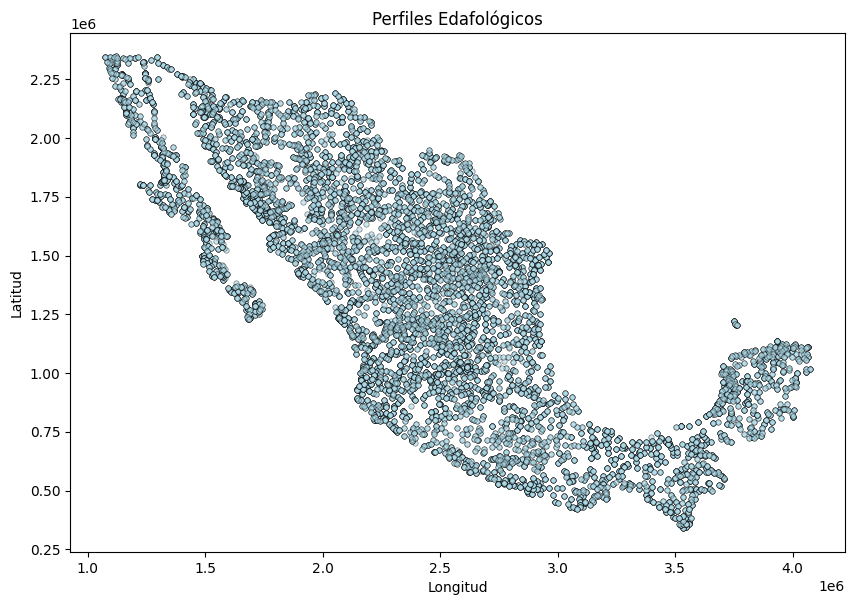

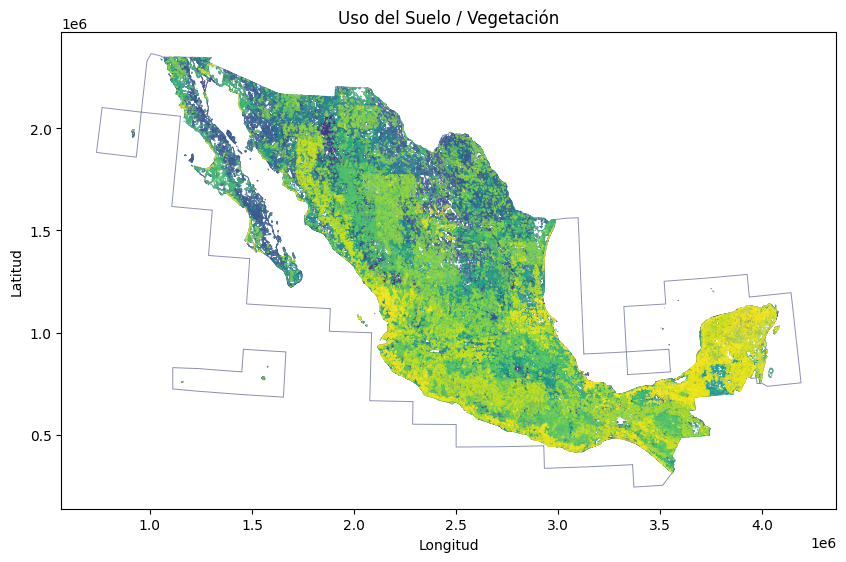

In [88]:
# Mapa de edafología
fig, ax = plt.subplots(figsize=(10, 8))
gdf_eda.plot(ax=ax, color='lightblue', edgecolor = 'black', linewidth = 0.4, markersize=15, alpha=0.6)
ax.set_title("Perfiles Edafológicos")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

# Mapa de uso del suelo / vegetación
fig, ax = plt.subplots(figsize=(10, 8))
gdf_suelo.plot(ax=ax,  facecolor="none",cmap='viridis', linewidth=0.7, alpha=0.6)
ax.set_title("Uso del Suelo / Vegetación")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

In [89]:
gdf_eda.columns

Index(['ID_PERFIL', 'COORD_X', 'COORD_Y', 'ZONA', 'IDHOJA', 'FECHA',
       'CLAVE_WRB', 'GPO_SUELO', 'CALIF_PRIM', 'CALIF_SEC', 'F_RúDICA',
       'ALTITUD', 'PRECIP', 'TEMP', 'GEOLOGíA', 'VEGETACIóN', 'PENDIENTE',
       'RELIEVE', 'PEDREG', 'AFLORAM', 'LIM_SUP', 'LIM_INF', 'NOMEN_HTE',
       'HORIZONTE', 'PROP_MAT', 'HCL', 'EST_FORMA', 'EST_TAM', 'EST_DES',
       'COL_CAMPO', 'CONS_SECO', 'CONS_HUM', 'ADHE', 'PLAS', 'PELíCULAS',
       'FACETAS', 'GRIETAS', 'GRAVAS', 'GUIJARROS', 'PIEDRAS', 'CONCRECIóN',
       'NóDULOS', 'MANCHAS', 'RAíCES', 'DREN_EXT', 'DREN_INT', 'R', 'L', 'A',
       'CLAS_TEXT', 'COL_SECO_L', 'COL_HUM_L', 'CE', 'PH', 'CO', 'CIC', 'SB',
       'SNA', 'K', 'CA', 'NA', 'MG', 'CACO3', 'CASO4', 'geometry'],
      dtype='object')

In [90]:
gdf_suelo.columns

Index(['CLAVE', 'DESCRIPCIO', 'geometry'], dtype='object')

In [91]:
df_clima.columns

Index(['Longitud', 'Latitud', 'Altitud', 'Estacion', 'Estado', 'Municipio',
       'Variable', '2014-01-01', '2014-01-02', '2014-01-03',
       ...
       '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
       '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30', '2024-12-31'],
      dtype='object', length=4025)

In [92]:
gdf_division.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'NOM_ENT', 'COV_', 'COV_ID',
       'AREA', 'PERIMETER', 'geometry'],
      dtype='object')

In [93]:
gdf_eda = gdf_eda.set_crs("EPSG:6372", allow_override=True)
gdf_division= gdf_division.to_crs(epsg=6372)
gdf_suelo = gdf_suelo.to_crs(gdf_division.crs)
print(gdf_division.crs)
print(gdf_eda.crs)
print(gdf_suelo.crs)

EPSG:6372
EPSG:6372
EPSG:6372


/tmp/ipykernel_2792/4076432929.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


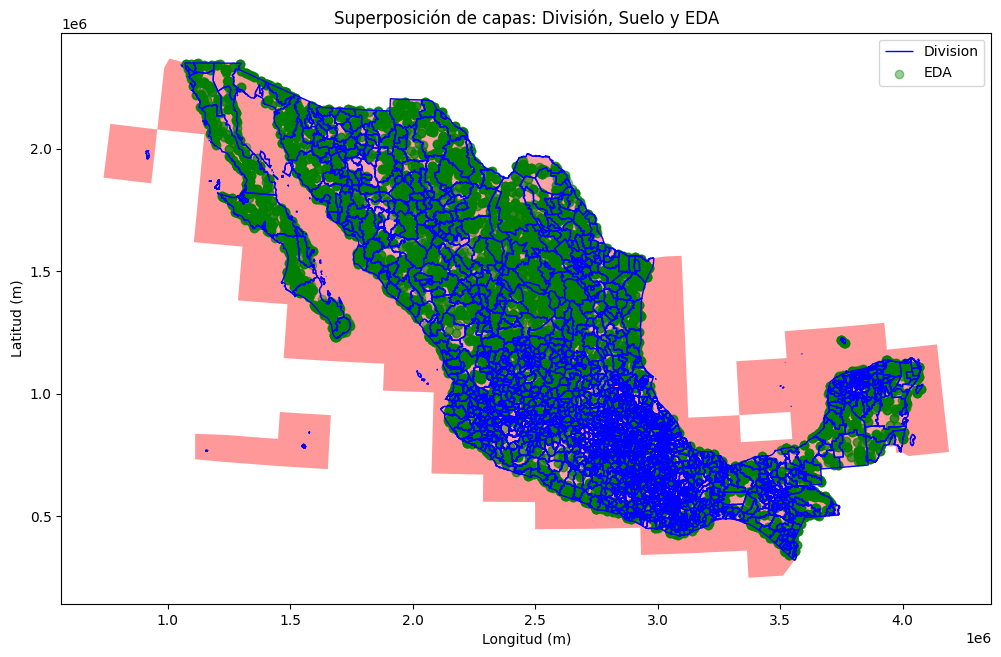

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

# Polígonos de división (municipios) en contorno azul
gdf_division.boundary.plot(ax=ax, edgecolor='blue', linewidth=1, label='Division')

# Polígonos de suelo en relleno semi-transparente rojo
gdf_suelo.plot(ax=ax, color='red', alpha=0.4, label='Suelo')

# Puntos o polígonos EDA en relleno verde (ajusta según geometría)
gdf_eda.plot(ax=ax, color='green', alpha=0.4, label='EDA')

# Leyenda y título
plt.legend()
plt.title("Superposición de capas: División, Suelo y EDA")
plt.xlabel("Longitud (m)")
plt.ylabel("Latitud (m)")

plt.show()


Ya coinciden los datos espacialmente, solo queda ver como implementarlos

In [95]:
# Contar cuántos polígonos hay de cada tipo de suelo
conteo_suelos = gdf_suelo['DESCRIPCIO'].value_counts()

# Mostrar resultados
print(conteo_suelos)

# Número total de tipos de suelo distintos
print("\nNúmero total de tipos de suelo distintos:", gdf_suelo['DESCRIPCIO'].nunique())


DESCRIPCIO
AGRICULTURA DE TEMPORAL ANUAL                                        22362
PASTIZAL INDUCIDO                                                    15518
ASENTAMIENTOS HUMANOS                                                14845
PASTIZAL CULTIVADO                                                   12651
CUERPO DE AGUA                                                        7992
                                                                     ...  
VEGETACIÓN SECUNDARIA HERBÁCEA DE MANGLAR                                1
VEGETACIÓN SECUNDARIA HERBÁCEA DE MATORRAL DE CONIFERAS                  1
VEGETACIÓN SECUNDARIA HERBÁCEA DE SELVA BAJA ESPINOSA CADUCIFOLIA        1
VEGETACIÓN SECUNDARIA HERBÁCEA DE PASTIZAL NATURAL                       1
VEGETACIÓN SECUNDARIA ARBÓREA DE SELVA BAJA PERENNIFOLIA                 1
Name: count, Length: 183, dtype: int64

Número total de tipos de suelo distintos: 183


In [96]:
def conteo_columnas(gdf, columna):
    """
    Cuenta los valores de una columna y devuelve conteo y número de valores distintos.

    Parámetros:
    - gdf: GeoDataFrame o DataFrame
    - columna: str, nombre de la columna a analizar

    Retorna:
    - conteo: Series con conteo de cada valor
    - num_distintos: int, número de valores distintos
    """
    conteo = gdf[columna].value_counts()
    num_distintos = gdf[columna].nunique()
    
    print(f"Conteo de valores en '{columna}':\n", conteo)
    print(f"\nNúmero total de valores distintos en '{columna}': {num_distintos}\n")




In [97]:
# Ejemplo de uso
conteo_columnas(gdf_eda, 'GPO_SUELO')

Conteo de valores en 'GPO_SUELO':
 GPO_SUELO
LUVISOL       2462
CALCISOL      2395
PHAEOZEM      1946
LEPTOSOL      1471
REGOSOL       1445
VERTISOL      1415
CAMBISOL      1313
ARENOSOL       630
CHERNOZEM      525
SOLONCHAK      418
FLUVISOL       364
KASTAÑOZEM     339
GLEYSOL        314
PLANOSOL       230
UMBRISOL       219
ANDOSOL        217
ACRISOL        164
GIPSISOL       160
SOLONETZ       159
DURISOL        148
LIXISOL        100
NITISOL         73
HISTOSOL        31
PLINTOSOL       28
Name: count, dtype: int64

Número total de valores distintos en 'GPO_SUELO': 24



In [98]:
# Ejemplo de uso
conteo_columnas(gdf_eda, 'CALIF_PRIM')

Conteo de valores en 'CALIF_PRIM':
 CALIF_PRIM
Endoléptico          2121
Epiléptico           1469
Lúvico                960
Sódico                937
Húmico                874
                     ... 
Hipogléyico             4
Grúmico                 4
Endopetroplíntico       4
Epipetrosálico          3
Hiperferrálico          3
Name: count, Length: 88, dtype: int64

Número total de valores distintos en 'CALIF_PRIM': 88



In [99]:
conteo_columnas(gdf_eda, 'GEOLOGíA')

Conteo de valores en 'GEOLOGíA':
 GEOLOGíA
Suelo Aluvial      6086
Sedimentaria       5053
Ígnea extrusiva    3157
Ígnea intrusiva     715
Metamórfica         414
Suelo Eólico        378
Suelo Lacustre      349
Suelo Litoral       228
Suelo Residual      122
Suelo Palustre       64
Name: count, dtype: int64

Número total de valores distintos en 'GEOLOGíA': 10



In [100]:
conteo_columnas(gdf_eda, 'VEGETACIóN')

Conteo de valores en 'VEGETACIóN':
 VEGETACIóN
MATORRAL                        4864
PASTIZAL                        2436
AGRICULTURA DE TEMPORAL         2296
BOSQUE                          1928
SELVA                           1921
AGRICULTURA DE RIEGO            1235
VEGETACION HALOFILA              517
MEZQUITAL                        332
VEGETACION SECUNDARIA            273
VEG. DE DESIERTOS ARENOSOS       165
MANGLAR                          152
AREA SIN VEGETACION APARENTE     118
CHAPARRAL                        108
VEGETACION DE DUNAS COSTERAS      85
VEGETACION HIDROFILA              45
VEGETACION DE GALERIA             27
SABANA                            24
PALMAR                            17
TULAR                             14
VEGETACION GIPSOFILA               7
POPAL                              2
Name: count, dtype: int64

Número total de valores distintos en 'VEGETACIóN': 21



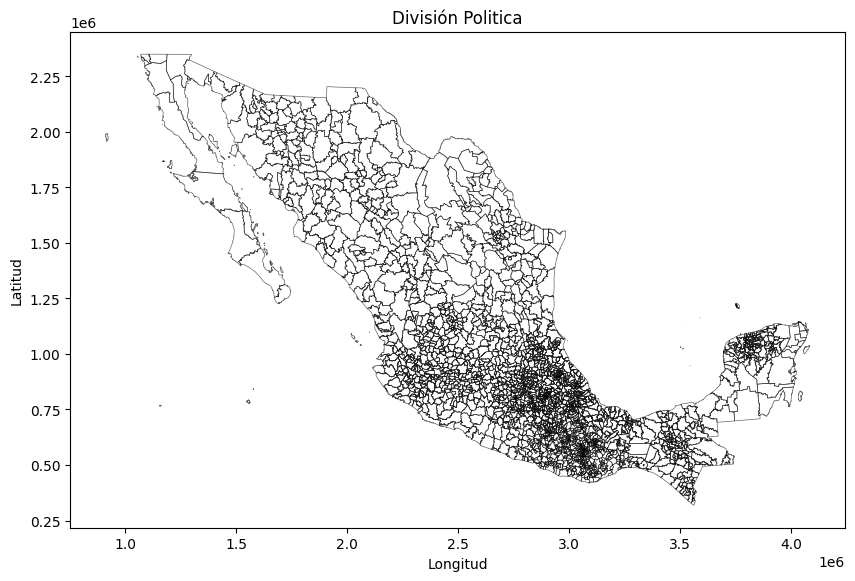

In [101]:
# Mapa de divison politica
fig, ax = plt.subplots(figsize=(10, 8))
gdf_division.plot(ax=ax, facecolor='none', edgecolor = 'black', linewidth = 0.5, markersize=15, alpha=0.6)
ax.set_title("División Politica")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

In [102]:
gdf_division.head(5)

CVEGEO CVE_ENT CVE_MUN                     NOMGEO         NOM_ENT  COV_  \
0  01008      01     008         San José de Gracia  Aguascalientes     0   
1  01009      01     009                   Tepezalá  Aguascalientes     1   
2  01010      01     010                   El Llano  Aguascalientes     2   
3  01011      01     011  San Francisco de los Romo  Aguascalientes     3   
4  01001      01     001             Aguascalientes  Aguascalientes     4   

   COV_ID           AREA      PERIMETER  \
0       1   85779.057424  181537.599566   
1       2   22966.101228   89329.531705   
2       3   50405.098875  144866.490025   
3       4   13777.017628  103689.065527   
4       5  116635.924756  256631.025245   

                                            geometry  
0  POLYGON ((2463679.819 1122454.043, 2463636.551...  
1  POLYGON ((2483386.269 1147520.506, 2483452.328...  
2  POLYGON ((2510504.977 1104537.995, 2511266.668...  
3  POLYGON ((2485534.556 1117425.794, 2485536.613...  
4  POLYGON ((2489959.178 1111683.059, 2489874.765...

In [105]:
gdf_suelo['DESCRIPCIO'].value_counts()

DESCRIPCIO
AGRICULTURA DE TEMPORAL ANUAL                                        22362
PASTIZAL INDUCIDO                                                    15518
ASENTAMIENTOS HUMANOS                                                14845
PASTIZAL CULTIVADO                                                   12651
CUERPO DE AGUA                                                        7992
                                                                     ...  
VEGETACIÓN SECUNDARIA HERBÁCEA DE MANGLAR                                1
VEGETACIÓN SECUNDARIA HERBÁCEA DE MATORRAL DE CONIFERAS                  1
VEGETACIÓN SECUNDARIA HERBÁCEA DE SELVA BAJA ESPINOSA CADUCIFOLIA        1
VEGETACIÓN SECUNDARIA HERBÁCEA DE PASTIZAL NATURAL                       1
VEGETACIÓN SECUNDARIA ARBÓREA DE SELVA BAJA PERENNIFOLIA                 1
Name: count, Length: 183, dtype: int64

In [ ]:
gdf_suelo['DESCRIPCIO'] = gdf_suelo['DESCRIPCIO'].apply(
    lambda x: 'VEGETACIÓN SECUNDARIA HERBÁCEA' if str(x).startswith('VEGETACIÓN SECUNDARIA HERBÁCEA') or str(x).startswith('VEGETACION SECUNDARIA HERBACEA') else x
)
gdf_suelo['DESCRIPCIO'] = gdf_suelo['DESCRIPCIO'].apply(
    lambda x: 'VEGETACIÓN SECUNDARIA ARBUSTIVA' if str(x).startswith('VEGETACIÓN SECUNDARIA ARBUSTIVA') or str(x).startswith('VEGETACION SECUNDARIA ARBUSTIVA') else x
)
gdf_suelo['DESCRIPCIO'] = gdf_suelo['DESCRIPCIO'].apply(
    lambda x: 'VEGETACIÓN SECUNDARIA ARBÓREA' if str(x).startswith('VEGETACIÓN SECUNDARIA ARBÓREA') else x
)
gdf_suelo['DESCRIPCIO'] = gdf_suelo['DESCRIPCIO'].apply(
    lambda x: 'SELVA BAJA' if str(x).startswith('SELVA BAJA') else x
)

In [111]:
gdf_suelo['DESCRIPCIO'].value_counts()

DESCRIPCIO
VEGETACIÓN SECUNDARIA ARBUSTIVA          35409
AGRICULTURA DE TEMPORAL ANUAL            22362
PASTIZAL INDUCIDO                        15518
ASENTAMIENTOS HUMANOS                    14845
VEGETACIÓN SECUNDARIA ARBÓREA            13223
                                         ...  
SELVA BAJA PERENNIFOLIA                     11
AGRICULTURA DE HUMEDAD PERMANENTE           10
AGRICULTURA DE HUMEDAD SEMIPERMANENTE       10
BOSQUE DE CEDRO                              5
SELVA ALTA SUBPERENNIFOLIA                   3
Name: count, Length: 85, dtype: int64

In [112]:
import geopandas as gpd
import pandas as pd

# Spatial join: qué suelos caen en cada polígono de division
joined = gpd.sjoin(gdf_suelo, gdf_division, how="inner", predicate="intersects")

# Contar intersecciones por polígono (CVEGEO) y categoría (DESCRIPCIO)
counts = (
    joined.groupby(["CVEGEO", "DESCRIPCIO"])
    .size()
    .reset_index(name="count")
)

# Pivotear para que cada DESCRIPCIO sea columna
pivot_counts = counts.pivot_table(
    index="CVEGEO", 
    columns="DESCRIPCIO", 
    values="count", 
    fill_value=0
).reset_index()

# Unir a division
division_final = gdf_division.merge(pivot_counts, on="CVEGEO", how="left").fillna(0)

# Asegurar enteros
for col in pivot_counts.columns:
    if col != "CVEGEO":
        division_final[col] = division_final[col].astype(int)


In [113]:
division_final

CVEGEO CVE_ENT CVE_MUN                        NOMGEO         NOM_ENT  \
0     01008      01     008            San José de Gracia  Aguascalientes   
1     01009      01     009                      Tepezalá  Aguascalientes   
2     01010      01     010                      El Llano  Aguascalientes   
3     01011      01     011     San Francisco de los Romo  Aguascalientes   
4     01001      01     001                Aguascalientes  Aguascalientes   
...     ...     ...     ...                           ...             ...   
2470  32014      32     014  General Francisco R. Murguía       Zacatecas   
2471  32043      32     043                    Susticacán       Zacatecas   
2472  32045      32     045                   Tepechitlán       Zacatecas   
2473  32046      32     046                     Tepetongo       Zacatecas   
2474  32047      32     047       Teúl de González Ortega       Zacatecas   

      COV_  COV_ID           AREA      PERIMETER  \
0        0       1   85779.057424  181537.599566   
1        1       2   22966.101228   89329.531705   
2        2       3   50405.098875  144866.490025   
3        3       4   13777.017628  103689.065527   
4        4       5  116635.924756  256631.025245   
...    ...     ...            ...            ...   
2470  2470    2467  478381.878319  397050.472305   
2471  2471    2468   19747.810966   90595.389397   
2472  2472    2469   53912.296267  147600.356437   
2473  2473    2470   71692.148226  202202.709425   
2474  2474    2471   67305.477116  217473.828631   

                                               geometry  ...  \
0     POLYGON ((2463679.819 1122454.043, 2463636.551...  ...   
1     POLYGON ((2483386.269 1147520.506, 2483452.328...  ...   
2     POLYGON ((2510504.977 1104537.995, 2511266.668...  ...   
3     POLYGON ((2485534.556 1117425.794, 2485536.613...  ...   
4     POLYGON ((2489959.178 1111683.059, 2489874.765...  ...   
...                                                 ...  ...   
2470  POLYGON ((2410098.027 1380469.811, 2410689.823...  ...   
2471  POLYGON ((2386521.517 1172577.752, 2386366.855...  ...   
2472  POLYGON ((2380644.199 1069179.271, 2380573.883...  ...   
2473  POLYGON ((2386521.517 1172577.752, 2386442.686...  ...   
2474  POLYGON ((2372879.651 1047006.26, 2372938.636 ...  ...   

      VEGETACIÓN DE DESIERTOS ARENOSOS  VEGETACIÓN DE DUNAS COSTERAS  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
2470                                 0                             0   
2471                                 0                             0   
2472                                 0                             0   
2473                                 0                             0   
2474                                 0                             0   

      VEGETACIÓN DE GALERÍA  VEGETACIÓN DE PETÉN  VEGETACIÓN GIPSÓFILA  \
0                         0                    0                     0   
1                         0                    0                     0   
2                         0                    0                     0   
3                         0                    0                     0   
4                         0                    0                     0   
...                     ...                  ...                   ...   
2470                      0                    0                     0   
2471                      0                    0                     0   
2472                      0                    0                     0   
2473                      0                    0                     0   
2474   

In [4]:
import geopandas as gpd

# Ruta al archivo GeoJSON
archivo = "Suelo/suelo_merged.geojson"

# Leer el GeoJSON
gdf = gpd.read_file(archivo)

gdf

CVE_ENT CVE_MUN                        NOMGEO         NOM_ENT  ACUICOLA  \
0         01     008            San José de Gracia  Aguascalientes       0.0   
1         01     009                      Tepezalá  Aguascalientes       0.0   
2         01     010                      El Llano  Aguascalientes       0.0   
3         01     011     San Francisco de los Romo  Aguascalientes       0.0   
4         01     001                Aguascalientes  Aguascalientes       0.0   
...      ...     ...                           ...             ...       ...   
2470      32     014  General Francisco R. Murguía       Zacatecas       0.0   
2471      32     043                    Susticacán       Zacatecas       0.0   
2472      32     045                   Tepechitlán       Zacatecas       0.0   
2473      32     046                     Tepetongo       Zacatecas       0.0   
2474      32     047       Teúl de González Ortega       Zacatecas       0.0   

      ASENTAMIENTOS  BOSQUE AYARIN  BOSQUE CEDRO  BOSQUE CULTIVADO  \
0          0.002500            0.0           0.0               0.0   
1          0.013174            0.0           0.0               0.0   
2          0.008931            0.0           0.0               0.0   
3          0.099746            0.0           0.0               0.0   
4          0.129709            0.0           0.0               0.0   
...             ...            ...           ...               ...   
2470       0.002731            0.0           0.0               0.0   
2471       0.000000            0.0           0.0               0.0   
2472       0.003957            0.0           0.0               0.0   
2473       0.004445            0.0           0.0               0.0   
2474       0.004151            0.0           0.0               0.0   

      BOSQUE ENCINO  ...        CIC         SB        SNA         K  \
0          0.236320  ...   9.425000  81.824997   2.987500  0.675000   
1          0.000000  ...  10.166667  66.666664   3.900000  1.833333   
2          0.025462  ...  10.175000  71.074997   4.275000  1.325000   
3          0.000000  ...        NaN        NaN        NaN       NaN   
4          0.000445  ...   5.500000  45.900002   3.200000  0.650000   
...             ...  ...        ...        ...        ...       ...   
2470       0.000000  ...  20.939444  80.762962  18.122963  1.029074   
2471       0.367321  ...        NaN        NaN        NaN       NaN   
2472       0.152248  ...  10.300000  87.566666   8.800000  0.533333   
2473       0.058325  ...  32.549999  78.275002   1.625000  2.200000   
2474       0.334210  ...  16.762501  37.859165   1.396667  1.068750   

             CA        NA        MG     CACO3  CASO4  \
0      7.262500  0.312500  4.412500  0.000000    0.0   
1     10.891666  0.491667  1.791667  0.000000    0.0   
2      4.900000  0.437500  1.450000  0.000000    0.0   
3           NaN       NaN       NaN       NaN    NaN   
4      3.200000  0.350000  0.850000  0.000000    0.0   
...         ...       ...       ...       ...    ...   
2470  27.555000  5.050926  2.313704  7.508889    0.0   
2471        NaN       NaN       NaN       NaN    NaN   
2472   3.766667  0.900000  5.666666  0.000000    0.0   
2473  14.750000  0.500000  8.600000  0.000000    0.0   
2474   4.353750  0.297500  2.186667  0.000000    0.0   

                                               geometry  
0     POLYGON ((2463679.819 1122454.043, 2463636.551...  
1     POLYGON ((2483386.269 1147520.506, 2483452.328...  
2     POLYGON ((2510504.977 1104537.995, 2511266.668...  
3     POLYGON ((2485534.556 1117425.794, 2485536.613...  
4     POLYGON ((2489959.178 1111683.059, 2489874.765...  
...                                                 ...  
2470  POLYGON ((2410098.027 1380469.811, 2410689.823...  
2471  POLYGON ((2386521.517 1172577.752, 2386366.855...  
2472  POLYGON ((2380644.199 1069179.271, 2380573.883...  
2473  POLYGON ((2386521.517 1172577.752, 2386442.686...  
2474  POLYGON ((2372879.651 1047006.26,

In [5]:
gdf.isnull().sum()

CVE_ENT       0
CVE_MUN       0
NOMGEO        0
NOM_ENT       0
ACUICOLA      0
           ... 
NA          349
MG          349
CACO3       349
CASO4       349
geometry      0
Length: 152, dtype: int64